In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



# Quick Pythonic Things


In [ ]:
# List Comprehension things
names = ['Charles', 'Susan', 'Patrick', 'George', 'Carol']
new_list = [n for n in names if n.startswith('C')]

b = {"abc", "def"}
{s.upper() for s in b}

c = {'name': 'Pooka', 'age': 5}
{v: k for k, v in c.items()}
["{}:{}".format(k.upper(), v) for k, v in c.items()]


['NAME:Pooka', 'AGE:5']

In [228]:
# What does .map do?
nums = [1, 2, 3]
doubled = map(lambda x: x * 2, nums)
print(list(doubled))

[2, 4, 6]


In [ ]:
# what does apply do? (use it when you really need rowwise transformations)
df = pd.DataFrame({
    'Math': [90, 80, 70],
    'Science': [85, 95, 65]
})

# Calculate average score per student (row)
df['Average'] = df.apply(lambda row: (row['Math'] + row['Science']) / 2, axis=1) # 1 is to use rows


## this is when to use transform. 
df['standardized'] = df[['Math']].transform(lambda x: (x - x.mean())/x.std())

df[['standard_math', 'standard_science']] = df[['Math', 'Science']].transform(lambda x: (x - x.mean())/x.std())
df


,Math,Science,Average,standardized,standard_math,standard_science
0,90,85,87.5,1.0,1.0,0.218218
1,80,95,87.5,0.0,0.0,0.872872
2,70,65,67.5,-1.0,-1.0,-1.091089


# Data Cleaning

In [240]:
# Load Data

# Load the data from the URL
url = 'https://raw.githubusercontent.com/bbwieland/ncaa-projections/main/data/KenPomGamesCleaned.csv'
df = pd.read_csv(url)

# Display the first 10 rows of the DataFrame
df.head(10)

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,...,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy,win_loss,team_score,opp_score,team_ppp,opp_ppp
0,7,Houston,219,Northern Colorado,"W, 83-36",64,0,NaN,Home,1,...,0,0,2022-11-07,87,NaN,1,83,36,1.296875,0.562500
1,6,Houston,210,Saint Joseph's,"W, 81-55",69,0,NaN,Neutral,2,...,0,0,2022-11-11,299,NaN,1,81,55,1.173913,0.797101
2,4,Houston,59,Oral Roberts,"W, 83-45",67,0,NaN,Home,3,...,0,0,2022-11-14,496,B,1,83,45,1.238806,0.671642
3,4,Houston,307,Texas Southern,"W, 83-48",66,0,NaN,Home,4,...,0,0,2022-11-16,615,NaN,1,83,48,1.257576,0.727273
4,3,Houston,47,Oregon,"W, 66-56",60,0,NaN,Away,5,...,0,0,2022-11-20,832,A,1,66,56,1.100000,0.933333
5,2,Houston,75,Kent St.,"W, 49-44",70,0,NaN,Home,6,...,0,0,2022-11-26,1114,NaN,1,49,44,0.700000,0.628571
6,2,Houston,179,Norfolk St.,"W, 100-52",64,0,NaN,Home,7,...,0,0,2022-11-29,1212,NaN,1,100,52,1.562500,0.812500
7,1,Houston,8,Saint Mary's,"W, 53-48",56,0,NaN,Semi-Home,8,...,0,0,2022-12-03,1464,A,1,53,48,0.946429,0.857143
8,1,Houston,226,North Florida,"W, 76-42",61,0,NaN,Home,9,...,0,0,2022-12-06,1548,NaN,1,76,42,1.245902,0.688525
9,1,Houston,3,Alabama,"L, 71-65",72,0,NaN,Home,9,...,0,0,2022-12-10,1691,A,0,65,71,0.902778,0.986111


In [198]:
# select data
selected_columns = ['team', 'date', 'team_score']
df_select = df[selected_columns]

### NOTE this is just creating a slice, not a copy

In [199]:
# rename columns
## old: new
new_col_names = {
    'team': 'Team_Name'
    , 'date': 'Game_Date'
    , 'team_score': 'Game_Score'
}

df_rename = df_select.rename(columns = new_col_names, inplace = False) 
##  inplace = false creates a copy. inplace = TRUE affects the real thing 

df_rename.head()

## rename programatically
df_rename.rename(columns = lambda x: x.replace('_', ''), inplace = True)
df_rename.head()

,TeamName,GameDate,GameScore
0,Houston,2022-11-07,83
1,Houston,2022-11-11,81
2,Houston,2022-11-14,83
3,Houston,2022-11-16,83
4,Houston,2022-11-20,66


In [243]:
# filter data
## use columns OR query
filtered_df = df[df['team_rk'] > 5]
filtered_df.head()

## you can also use the query function
df.query('team_rk > 5')[selected_columns] ## and you can chain commands

## or you can use a "is in" method
df[df['team'].isin(['Houston','UCLA'])]

df.loc[df['team'].isin(['Houston','UCLA'])]


## you can also analyze strings
df[df['team'].str.contains('New|UC')]


,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,...,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy,win_loss,team_score,opp_score,team_ppp,opp_ppp
29,11,UCLA,224,Sacramento St.,"W, 76-50",68,0,NaN,Home,1,...,0,0,2022-11-07,153,NaN,1,76,50,1.117647,0.735294
30,13,UCLA,153,Long Beach St.,"W, 93-69",81,0,NaN,Home,2,...,0,0,2022-11-11,355,NaN,1,93,69,1.148148,0.851852
31,11,UCLA,179,Norfolk St.,"W, 86-56",63,0,NaN,Home,3,...,0,0,2022-11-14,516,NaN,1,86,56,1.365079,0.888889
32,9,UCLA,26,Illinois,"L, 79-70",77,0,NaN,Neutral,3,...,0,0,2022-11-18,724,A,0,70,79,0.909091,1.025974
33,10,UCLA,13,Baylor,"L, 80-75",69,0,NaN,Neutral,3,...,0,0,2022-11-20,5694,A,0,75,80,1.086957,1.159420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,355,New Orleans,336,McNeese St.,"L, 79-78",67,0,NaN,Home,6,...,3,10,2023-02-11,4563,NaN,0,78,79,1.164179,1.179104
9472,354,New Orleans,301,Texas A&M Commerce,"W, 84-78",72,0,NaN,Away,7,...,4,10,2023-02-16,4826,NaN,1,84,78,1.166667,1.083333
9473,353,New Orleans,212,Northwestern St.,"W, 68-65",67,0,NaN,Away,8,...,5,10,2023-02-18,4903,NaN,1,68,65,1.014925,0.970149
9474,348,New Orleans,253,Nicholls St.,"W, 88-82",78,0,NaN,Home,9,...,6,10,2023-02-23,5139,NaN,1,88,82,1.128205,1.051282


In [ ]:
# create new columns
## you can define a new column with column operations
df['total_score'] = df['team_score'] + df['opp_score']
df.head()

## you can define and apply a function
### apply applies the function rowwise
df['team_score_squared'] = df['team_score'].apply(lambda x: x**2)
df.head()

## you can also use where from numpy to do ifelse logic
df['top5'] = np.where(df['team_rk'] < 6, 'Top 5' , '5+')

## the assign function can create columns in line. x is calling the dataframe
### assign doesn't apply row wise
df = df.assign(team_score_doubled =lambda x: x['team_score'] * 2)

### you can also use list comprehensions inside assign to do more complex things
### and you can also call summaries of the columns within the assign function
### use the parentheses before and after the whole expression to break it up across multiple lines
df = (df.assign(
    scaled_score = lambda x: (x['total_score'] - x['total_score'].min())/(x['total_score'].max() - x['total_score'].min())
)
      .sort_values(by = 'scaled_score', ascending = False)
      .assign( Grade = lambda x: ['A' if score >= .9 else 'B' if score >= .8 else 'C' for score in x['scaled_score']])
     )
          
df
# sort data (embedded in above using sort_values



,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,...,team_score,opp_score,team_ppp,opp_ppp,total_score,team_score_squared,top5,team_score_doubled,scaled_score,Grade
4632,173,Lipscomb,226,North Florida,"L, 114-111",93,2,NaN,Home,16,...,111,114,1.193548,1.225806,225,12321,5+,222,1.000000,A
6345,248,North Florida,164,Lipscomb,"W, 114-111",93,2,NaN,Away,12,...,114,111,1.225806,1.193548,225,12996,5+,228,1.000000,A
7462,293,UC San Diego,153,Long Beach St.,"L, 112-110",98,3,NaN,Home,7,...,110,112,1.122449,1.142857,222,12100,5+,220,0.978571,A
4321,178,Long Beach St.,267,UC San Diego,"W, 112-110",98,3,NaN,Away,10,...,112,110,1.142857,1.122449,222,12544,5+,224,0.978571,A
245,6,Texas,18,Kansas St.,"L, 116-103",82,0,NaN,Home,12,...,103,116,1.256098,1.414634,219,10609,5+,206,0.957143,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,45,Wisconsin,72,Dayton,"W, 43-42",63,0,NaN,Neutral,4,...,43,42,0.682540,0.666667,85,1849,5+,86,0.000000,C
8234,229,Mount St. Mary's,327,Loyola MD,"W, 51-34",57,0,NaN,Home,5,...,51,34,0.894737,0.596491,85,2601,5+,102,0.000000,C
9116,275,Loyola MD,295,Mount St. Mary's,"L, 51-34",57,0,NaN,Away,4,...,34,51,0.596491,0.894737,85,1156,5+,68,0.000000,C
838,16,Auburn,41,Northwestern,"W, 43-42",61,0,NaN,Neutral,6,...,43,42,0.704918,0.688525,85,1849,5+,86,0.000000,C


In [ ]:
# Case When Logic
df['top5'] = "Unknown"  # Default value
df['top5'] = df['top5'].case_when([
    (df['team_rk'].between(0, 5, inclusive='both'), 'Top 5'),
    (df['team_rk'].between(6, 10, inclusive='both'), 'Top 10'),
    (df['team_rk'] > 10, 'Other')
])

df['top5']


## WE can also use loc for this
# Update 'col3' where 'col1' is greater than 2
# df.loc[df['col1'] > 2, 'col3'] = 100

# Update 'col2' where 'col1' is even and 'col3' is less than 40
# df.loc[(df['col1'] % 2 == 0) & (df['col3'] < 40), 'col2'] = 'Updated'


## also we can use np.select()
conditions = [
    df['Score'] >= 90,
    df['Score'] >= 80,
    df['Score'] >= 70
]
choices = ['A', 'B', 'C']

grade = np.select(conditions, choices, default='F')

KeyError: 'team_rk'

In [10]:
# summarise data
# and grouby by
df.groupby(['team', 'opponent'])[['team_score', 'opp_score']].sum().reset_index()
## don't forget to reset index if you want it to look normal again
df.groupby(['team', 'opponent'])[['team_score', 'opp_score']].mean().reset_index()

## you can also use an agg function
df.groupby('team').agg(
    mean_team = ('team_score', 'mean')
    , sum_team = ('team_score', 'sum')
    , mean_opp = ('opp_score', 'mean')
    , sum_opp = ('opp_score', 'sum')
).reset_index()

### MOST AGG FUNCTIONS IGNORE NA's


,team,mean_team,sum_team,mean_opp,sum_opp
0,Abilene Christian,72.375000,1737,75.250000,1806
1,Air Force,67.033333,2011,66.833333,2005
2,Akron,72.370370,1954,66.296296,1790
3,Alabama,83.344828,2417,69.103448,2004
4,Alabama A&M,68.653846,1785,71.884615,1869
...,...,...,...,...,...
358,Wright St.,78.620690,2280,74.931034,2173
359,Wyoming,68.000000,1836,71.851852,1940
360,Xavier,81.862069,2374,74.275862,2154
361,Yale,73.916667,1774,63.375000,1521


In [ ]:
## Explicitly handling NA's in the agg function 
df.groupby('team').agg({'team_score': lambda x: x.mean(skipna=True)})

df.groupby('team').agg(
    mean_team = ('team_score', lambda x: x.mean(skipna=True))
    , sum_team = ('team_score',  lambda x: x.sum(skipna=True))
    , mean_opp = ('opp_score', 'mean')
    , sum_opp = ('opp_score', 'sum')
).reset_index()

In [ ]:
# handle na's
df.isna() ## find the NA's
df.isna().sum() ## count the NA's

# drop rows with any missing values
df.dropna(subset = ['team_score'])

# drop columns with any missing vals
df.dropna(axis = 1)

## fill missing values
df.fillna(0) 
df['team_score'].fillna(df['team_score'].mean()) ## or fill a column with a mean of a column
df.sort_values(by = ['team', 'date'], ascending = [False, True]).['team_score'].ffill()

## forward fill NA's (Fill with last valid observation)
df['team_score'].ffill()
df.bfill() ## back fill

### MOST AGG FUNCTIONS IGNORE NA's


,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,...,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy,win_loss,team_score,opp_score,team_ppp,opp_ppp
5160,184,Abilene Christian,86,Utah Valley,"L, 66-62",70,0,NaN,Home,13,...,5,10,2023-02-25,5268,NaN,0,62,66,0.885714,0.942857
5159,179,Abilene Christian,127,Stephen F. Austin,"L, 91-89",84,2,NaN,Home,13,...,5,9,2023-02-22,5094,NaN,0,89,91,1.059524,1.083333
5158,184,Abilene Christian,131,Grand Canyon,"L, 94-84",70,0,NaN,Away,13,...,5,8,2023-02-17,4842,B,0,84,94,1.200000,1.342857
5157,169,Abilene Christian,70,Sam Houston St.,"L, 77-62",65,0,NaN,Home,13,...,5,7,2023-02-11,4576,NaN,0,62,77,0.953846,1.184615
5156,203,Abilene Christian,150,Cal Baptist,"W, 87-71",65,0,NaN,Away,13,...,5,6,2023-02-04,4262,NaN,1,87,71,1.338462,1.092308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,170,Youngstown St.,178,Navy,"L, 80-67",65,0,NaN,Away,4,...,0,0,2022-11-20,824,NaN,0,67,80,1.030769,1.230769
3415,184,Youngstown St.,267,UC San Diego,"W, 73-54",64,0,NaN,Neutral,4,...,0,0,2022-11-19,775,NaN,1,73,54,1.140625,0.843750
3414,192,Youngstown St.,171,Notre Dame,"L, 88-81",70,0,NaN,Away,2,...,0,0,2022-11-13,455,NaN,0,81,88,1.157143,1.257143
3413,202,Youngstown St.,268,Tennessee Martin,"W, 90-72",74,0,NaN,Home,2,...,0,0,2022-11-09,215,NaN,1,90,72,1.216216,0.972973


In [ ]:
df_explore = df.copy()
df_explore['w_conference_fill'] = df_explore['w_conference'].fillna(df_explore.groupby('team')['w_conference'].transform('mean')) ## or fill a column with a mean of a column

## transform works in the above because we need to return a column the same size as the original. whereas just using 
## .mean() would have reduced the dimensions too much

df_explore[df_explore['w_conference'].isna()][['team', 'w_conference_fill', 'w_conference']]


,team,w_conference_fill,w_conference
1095,Miami FL,7.421053,NaN
3890,Cornell,4.153846,NaN
6162,Northern Arizona,1.882353,NaN
2909,Southern Utah,6.375000,NaN
2686,James Madison,5.944444,NaN
...,...,...,...
1808,Wisconsin,4.411765,NaN
8234,Mount St. Mary's,3.000000,NaN
9116,Loyola MD,2.666667,NaN
838,Auburn,5.625000,NaN


In [ ]:
## melt! 
pd.melt(df, id_vars = 'team'
, value_vars = ['team_score', 'opp_score']
, var_name = 'which_team'
, value_name = 'score')

,team,which_team,score
0,Lipscomb,team_score,111
1,North Florida,team_score,114
2,UC San Diego,team_score,110
3,Long Beach St.,team_score,112
4,Texas,team_score,103
...,...,...,...
20295,Wisconsin,opp_score,42
20296,Mount St. Mary's,opp_score,34
20297,Loyola MD,opp_score,51
20298,Auburn,opp_score,42


In [36]:
# wide and long data

## melt wide to long
pd.melt(df, id_vars = 'team'
, value_vars = ['team_score', 'opp_score']
, var_name = 'which_team'
, value_name = 'score')

# keep all the other columns too 
# Specify the value variables
value_vars = ['team_score', 'opp_score']

# Dynamically create id_vars by dropping value_vars from the DataFrame's columns
id_vars = df.drop(columns=value_vars).columns.tolist()

df_long = df.melt( id_vars = id_vars
, value_vars = value_vars
, var_name = 'which_team'
, value_name = 'score')

df_long.head()



,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,...,team_ppp,opp_ppp,total_score,team_score_squared,top5,team_score_doubled,scaled_score,Grade,which_team,score
0,173,Lipscomb,226,North Florida,"L, 114-111",93,2,NaN,Home,16,...,1.193548,1.225806,225,12321,5+,222,1.000000,A,team_score,111
1,248,North Florida,164,Lipscomb,"W, 114-111",93,2,NaN,Away,12,...,1.225806,1.193548,225,12996,5+,228,1.000000,A,team_score,114
2,293,UC San Diego,153,Long Beach St.,"L, 112-110",98,3,NaN,Home,7,...,1.122449,1.142857,222,12100,5+,220,0.978571,A,team_score,110
3,178,Long Beach St.,267,UC San Diego,"W, 112-110",98,3,NaN,Away,10,...,1.142857,1.122449,222,12544,5+,224,0.978571,A,team_score,112
4,6,Texas,18,Kansas St.,"L, 116-103",82,0,NaN,Home,12,...,1.256098,1.414634,219,10609,5+,206,0.957143,A,team_score,103


In [37]:

##### long to wide

index_vars = df_long.drop(columns= ['which_team', 'score']).columns.tolist()

df_long.pivot(index = index_vars, columns = 'which_team', values= 'score').reset_index()

## this aggregates 
# (df_long[['team', 'which_team', 'score']]
#  .pivot_table(index = 'team', columns = 'which_team', values= 'score', aggfunc = 'mean')
#  .reset_index() 
# )


which_team,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,...,team_ppp,opp_ppp,total_score,team_score_squared,top5,team_score_doubled,scaled_score,Grade,opp_score,team_score
0,1,Connecticut,119,Butler,"W, 68-46",67,0,NaN,Away,12,...,1.014925,0.686567,114,4624,Top 5,136,0.207143,C,46,68
1,1,Connecticut,209,Georgetown,"W, 84-73",71,0,NaN,Home,13,...,1.183099,1.028169,157,7056,Top 5,168,0.514286,C,73,84
2,1,Houston,3,Alabama,"L, 71-65",72,0,NaN,Home,9,...,0.902778,0.986111,136,4225,Top 5,130,0.364286,C,71,65
3,1,Houston,8,Saint Mary's,"W, 53-48",56,0,NaN,Semi-Home,8,...,0.946429,0.857143,101,2809,Top 5,106,0.114286,C,48,53
4,1,Houston,37,Memphis,"W, 72-64",66,0,NaN,Home,25,...,1.090909,0.969697,136,5184,Top 5,144,0.364286,C,64,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10145,363,LIU,321,Fairleigh Dickinson,"L, 80-79",77,0,NaN,Home,3,...,1.025974,1.038961,159,6241,5+,158,0.528571,C,80,79
10146,363,LIU,331,Sacred Heart,"W, 74-70",72,0,NaN,Away,3,...,1.027778,0.972222,144,5476,5+,148,0.421429,C,70,74
10147,363,LIU,332,Stonehill,"L, 73-66",66,0,NaN,Home,2,...,1.000000,1.106061,139,4356,5+,132,0.385714,C,73,66
10148,363,LIU,341,Central Connecticut,"L, 58-42",65,0,NaN,Home,2,...,0.646154,0.892308,100,1764,5+,84,0.107143,C,58,42


In [ ]:
# join data

## use .merge
outer_join = pd.merge(df1, df2, how='outer', on='id') 

## use .join (joins on the index)
df_join = df4.join(df3, how='left')
print(df_join)


In [220]:
# Datetime data
df_dates = pd.DataFrame({
    'date_str': ['01-05-2025', '02-05-2025', '03-05-2025']
    , 'date_str2': ['1 May 2025', '15 June 2025', '30 July 2025']

})

df_dates['date'] = pd.to_datetime(df_dates['date_str'], format='%d-%m-%Y')
df_dates['date2'] = pd.to_datetime(df_dates['date_str2'], format='%d %B %Y')

df_dates['date2'].dt.day



0     1
1    15
2    30
Name: date2, dtype: int32

In [ ]:
# Text data 
import string

text = "Hello, world!!!"
cleaned = text.translate(str.maketrans('', '', string.punctuation))
cleaned


df_text = pd.DataFrame({
    'text': [
        '  Hello, WORLD!!!  ',
        'Python123 is FUN.',
        'Clean   ME    please!!',
        'Emails like me@example.com are tricky.',
        '12345 only numbers'
    ]
})

# make lowercase
df_text['clean'] = df_text['text'].str.lower()

# remove punctuation
df_text['clean'] = df_text['text'].str.replace(f"[{string.punctuation}]", "", regex=True)

# removve numbers
df_text['clean'] = df_text['text'].str.replace(r'\d+', '', regex=True)

## filter for specific words
df_text[df_text['text'].str.contains('python', case=False)]





,text,clean
1,Python123 is FUN.,Python is FUN.


In [241]:
# Pivot Tables

# Pivot table with multiple index
data_multi_index = {'Region': ['North', 'North', 'South', 'South', 'North', 'South'],
                   'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
                   'Item': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Value': [10, 15, 20, 25, 30, 35]}
df_multi_index = pd.DataFrame(data_multi_index)

pivot_table_multi_index = pd.pivot_table(df_multi_index, values='Value', index=['Region', 'Category'], columns='Item', aggfunc=np.sum)
print(pivot_table_multi_index)
# Output:
# Item                 X     Y
# Region Category             
# North  A          20.0  15.0
#        B           NaN  15.0
# South  A          20.0   NaN
#        B           NaN  35.0

Item                X     Y
Region Category            
North  A         40.0   NaN
       B          NaN  15.0
South  A         20.0   NaN
       B          NaN  60.0


/var/folders/hs/f91yk2396f3850v077bfmkcm0000gn/T/ipykernel_80734/639134420.py:10: FutureWarning: The provided callable <function sum at 0x1142c84a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table_multi_index = pd.pivot_table(df_multi_index, values='Value', index=['Region', 'Category'], columns='Item', aggfunc=np.sum)


# Basic Supervised ML
##### The purpose here is for predicting/classifying. this is NOT for understanding causal effects or underlying structure (I find this less useful to be honest)

- training/testing split
- regressions
  - linear
  - logistic
  - ridge
  - lasso
- trees
  - single tree
  - random forest
- naive bayes

In [247]:
# set up the right packages
import numpy as mp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## all the models:
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, LassoCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

## eval metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_iris, load_breast_cancer

In [248]:
breast_cancer = load_breast_cancer()

In [254]:
## general framework
## load the data

# create dataframe

df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df['target'] = breast_cancer.target

df.rename(columns = lambda x: x.replace(' ', '_'), inplace = True) ## rename the column names

# Simplify the problem to binary classification 
X = df.drop('target', axis=1)  # split the X vars and the Y vars
y = df['target']

# train test split syntax has vars train, vars test, outcome train, outcome test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
## insert some exploratory analysis here. 
## extract out the mean and standard deviations. 
value_vars = [0, 1]
means = df.groupby('target').mean().reset_index().transpose().reset_index().melt(id_vars = 'index', value_vars = value_vars, var_name = 'response', value_name = 'mean')
sds = df.groupby('target').std().reset_index().transpose().reset_index().melt( id_vars = 'index', value_vars = value_vars, var_name = 'response', value_name = 'sd')
descriptive_stats = pd.merge(means, sds, on = ['index', 'response'])
descriptive_stats.sort_values(by = ['index', 'response'])


,index,response,mean,sd
14,area_error,0,72.672406,61.355268
45,area_error,1,21.135148,8.843472
16,compactness_error,0,0.032281,0.018387
47,compactness_error,1,0.021438,0.016352
18,concave_points_error,0,0.015060,0.005517
...,...,...,...,...
56,worst_smoothness,1,0.124959,0.020013
29,worst_symmetry,0,0.323468,0.074685
60,worst_symmetry,1,0.270246,0.041745
22,worst_texture,0,29.318208,5.434804


In [256]:
count_class = y.value_counts()

def labeled_bars(x, y, ylabel = 'y', title = "title") :
    """This function creates a simple, unidimensional, labelled bar chart.
    input: the categoies for the x axis, the counts for the y axis, ylabel, title
    output: displays a bar chart
    """
    fig, ax = plt.subplots()
    bar_container = ax.bar(x, y)
    ax.set(ylabel = ylabel, title= title)
    ax.bar_label(bar_container, fmt='{:,.0f}')

labeled_bars(count_class.index, count_class.values, "Count", "Class Count")

In [257]:
## pre process the training data

## get the numeric columns
numeric_columns = X_train.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_columns)

## get the categorical columns
# Select categorical columns (object, category, bool)
categorical_columns = X_train.select_dtypes(include=['object', 'category', 'bool']).columns
print("Categorical columns:", categorical_columns)

# one column at a time
X_train = X_train.assign(worst_perimeter = lambda x: (x['worst_perimeter'] - x['worst_perimeter'].mean())/x['worst_perimeter'].std())

# or all the columns together 
X_train[numeric_columns] = X_train[numeric_columns].apply(lambda x: (x - x.mean())/x.std())
X_test[numeric_columns] = X_test[numeric_columns].apply(lambda x: (x - x.mean())/x.std())



Numeric columns: Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')
Categorical columns: Index([], dtype='object')


In [ ]:
# Standardize the features as necessary
### I can also scale using this scaler, but I like the controll that doing it manually gives me
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [258]:
log_model = LogisticRegression() # initiate the model
log_model.fit(X_train, y_train)  # train the model
log_model.coef_

array([[-0.43189   , -0.38813372, -0.39343269, -0.46541689, -0.07160235,
         0.54004817, -0.80207201, -1.12069539,  0.23510409,  0.07539025,
        -1.2689555 ,  0.18850701, -0.61052059, -0.9079316 , -0.31267737,
         0.68224672,  0.17559257, -0.31107983,  0.50068057,  0.61574912,
        -0.88017432, -1.35136762, -0.58950042, -0.84256327, -0.54556237,
         0.01598836, -0.94330777, -0.77764991, -1.2077388 , -0.15627663]])

In [61]:
# make predictions
y_pred = log_model.predict(X_test)
# judge the accuracy 
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

## precision: TP/TP + FP ## of the positive results that you see, what percent are true
## Recall = True Positives / (True Positives + False Negatives) ## of all the postive cases, how many did it find?
## Accuracy is TP + TN/all 


Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Evaluating a regression, not a classification

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R^2 (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R² (Coefficient of Determination): {r2}")

# Adjusted R²
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R²: {adjusted_r2}")

In [66]:
# If you want classical statistics, you MUST train using stats models
import statsmodels.api as sm

# Add a constant (intercept) to the model
X_train_sm = sm.add_constant(X_train)

# # Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# # Get a summary of the model
# print(result.summary())

# result.params


         Current function value: inf
         Iterations: 35


/Users/samuelpowers/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/samuelpowers/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

In [ ]:
## Oversample as necessary
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)                                  # creates synthetic new samples by interpolating between the minority class
adasyn = ADASYN(random_state=42, sampling_strategy='minority')


X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)


In [99]:
# we could also do the whle thing with the imbalanced analysis packages
from imblearn.ensemble import BalancedRandomForestClassifier


In [110]:
### Feature selection !

from sklearn.feature_selection import RFE

# Sample data
X = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6],
    'D': [10, 20, 30, 40, 50]
})

y = [0, 1, 0, 1, 0]

# Initialize the model
model = LogisticRegression()

# Apply RFE to select 2 features
selector = RFE(model, n_features_to_select=2)
X_selected = selector.fit_transform(X, y)

# Print selected features
print("Selected features:", X.columns[selector.support_])

Selected features: Index(['C', 'D'], dtype='object')


In [142]:
## we can also do a lasso or ridge to force parameters to 0 as necessary

# Initialize Lasso model
lasso = Lasso(alpha=0.1)  # alpha controls the strength of regularization

# Fit the model
lasso.fit(X, y)

# Print selected features
selected_features = X.columns[(lasso.coef_ != 0)]
print("Selected features using Lasso:", selected_features)


### or do it with cross validation
# Define a range of alpha values to test
alphas = np.logspace(-4, 2, 20)

# Create a LassoCV object with 5-fold cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5)

# Fit the model on the training data
lasso_cv.fit(X_train, y_train)

# Get the best alpha value found by cross-validation
best_alpha = lasso_cv.alpha_

# Evaluate the model on the test data
test_score = lasso_cv.score(X_test, y_test)

print("Best alpha:", best_alpha)
print("Test score:", test_score)

# Use the model to make predictions
predictions = lasso_cv.predict(X_test)


Selected features using Lasso: Index([], dtype='object')
Best alpha: 0.0008858667904100823
Test score: 0.7470446705660034


/Users/samuelpowers/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04534876094439255, tolerance: 0.008638186813186814
  model = cd_fast.enet_coordinate_descent_gram(
/Users/samuelpowers/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.052343279131463305, tolerance: 0.008638186813186814
  model = cd_fast.enet_coordinate_descent_gram(
/Users/samuelpowers/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2648715663275567, tolerance: 0.008638186813186814
  model = cd_fast.enet_coordinate_descent_gram(
/Users/samuelpowers

In [114]:
# Random Forest Importance

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100)

# Fit the model
rf.fit(X_train, y_train)

# Print feature importances
importances = rf.feature_importances_
print("Feature importances:", importances)

# Select the most important features (e.g., top 2)
select_num = 8
important_features = X_train.columns[importances.argsort()[-select_num:][::-1]]
print(f"Top {select_num} important features: {important_features}")

Feature importances: [0.02701481 0.01588432 0.04217316 0.02042405 0.0042523  0.01424578
 0.04788345 0.11074799 0.00380347 0.00424772 0.01664574 0.0036281
 0.01230454 0.02301517 0.00407853 0.0058828  0.00767724 0.00639136
 0.0050172  0.00479965 0.09123945 0.02067717 0.19015069 0.08361822
 0.01029836 0.01713315 0.03715231 0.14725703 0.01498363 0.00737264]
Top 8 important features: Index(['worst_perimeter', 'worst_concave_points', 'mean_concave_points',
       'worst_radius', 'worst_area', 'mean_concavity', 'mean_perimeter',
       'worst_concavity'],
      dtype='object')


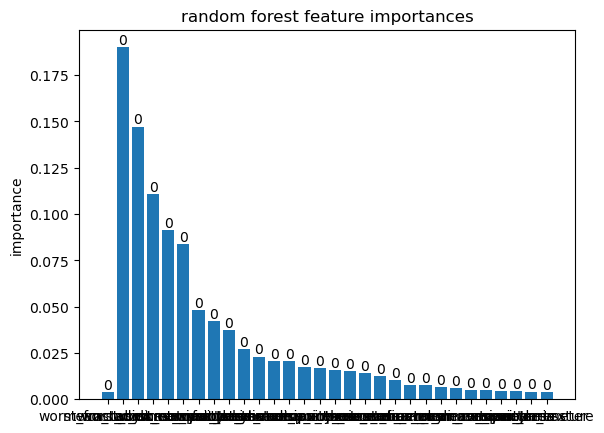

In [133]:
labeled_bars( X_train.columns[-importances.argsort()]
             , importances[-importances.argsort()]
             , ylabel = "importance", title = "random forest feature importances")

In [ ]:
## SK Learn will also do the feature selection for you if you want it to
from sklearn.feature_selection import SelectFromModel

# Initialize model
model = RandomForestClassifier(n_estimators=100)

# Fit the model
model.fit(X_train, y_train)

# Select important features using SelectFromModel
selector = SelectFromModel(model, threshold= "mean")  # Can set threshold to 'mean', 'max', or a number
# X_selected = selector.transform(X_train)

# Print selected features
selected_columns = X_train.columns[selector.get_support()]
print("Selected features:", selected_columns)

[X_train.columns[x] for x in  selector.get_support(indices = True)]

Selected features: Index(['mean_perimeter', 'mean_concavity', 'mean_concave_points', 'area_error',
       'worst_radius', 'worst_perimeter', 'worst_area', 'worst_concavity',
       'worst_concave_points'],
      dtype='object')


In [ ]:
# make predictions
y_pred = model.predict(X_test)

# judge the accuracy 
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

## precision: TP/TP + FP ## of the positive results that you see, what percent are true
## Recall = True Positives / (True Positives + False Negatives) ## of all the postive cases, how many did it find?
## Accuracy is TP + TN/all 

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[40  3]
 [ 1 70]]


# Classes and Defs

In [ ]:
## set up a class with a self init. 
## the self enables us to call the class with an initial set of attributes that we then pass into the subsidiary defs

class Dog:
    def __init__(self, name, breed):
        self.name = name
        self.breed = breed

    def bark(self):
        print("Woof! My name is", self.name)

my_dog = Dog("Buddy", "Golden Retriever")
my_dog.bark()  # Output: Woof! My name is Buddy

Woof! My name is Buddy


# Text Cleaning/ Analysis
# Basic Unsupervised ML
- Distance Matrices
- Hierarcical clustering
- Non Heirarchical clustering
# Randomization Inference including A/B test analysis


In [245]:
# basic stats:
df[['poss', 'opp_score', 'team_ppp']].corr()

,poss,opp_score,team_ppp
poss,1.000000,0.491168,-0.000316
opp_score,0.491168,1.000000,-0.021146
team_ppp,-0.000316,-0.021146,1.000000


In [304]:
### randomization inference

import random
import math


def rand_int_prop(prop1, prop2, n1, n2, resamples):
    """This function conducts randomization inference to non parametrically test significance for two proportions
    Args:
      prop1: proportion of successes in population 1
      prop2: proportion of successes in population 2
      n1: Size of population 1
      n2: size of population 2
      resamples: number of resamples to use to computer p-value

    Returns:
        Test statistic and p-value 
    """

    x1 = math.ceil(prop1 * n1)
    y1 = n1 - x1

    x2 = math.ceil(prop2 * n2)
    y2 = n2 - x2

    set1 = [1] * x1 + [0] * y1
    set2 = [1] * x2 + [0] * y2

    total_set = set1 + set2

    test_stat = prop1 - prop2
    ratio = prop1/prop2

    shuffled_stats = []
    shuffled_ratio = []
    for i in range(resamples) :
        shuffled_set = random.sample(total_set, n1+n2 )
        shuffled_set1 = shuffled_set[:n1]
        shuffled_set2 = shuffled_set[n1:(n1+n2)]
        shuffled_stats.append(np.mean(shuffled_set1) - np.mean(shuffled_set2))
        shuffled_ratio.append(np.mean(shuffled_set1)/np.mean(shuffled_set2))

    if prop1 > prop2:
        p_val = np.mean([i >= test_stat for i in shuffled_stats])
    else:
        p_val = np.mean([i <= test_stat for i in shuffled_stats])

    print(f"Test statistic: {round(test_stat, 3)}", 
        f"P value: {p_val}")





In [306]:
rand_int_prop(.65, .5, 100, 150, 1000)


Test statistic: 0.15 P value: 0.016


# Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from textwrap import wrap

palette = sns.color_palette("colorblind")


%matplotlib inline

In [ ]:
## load in a new dataset
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


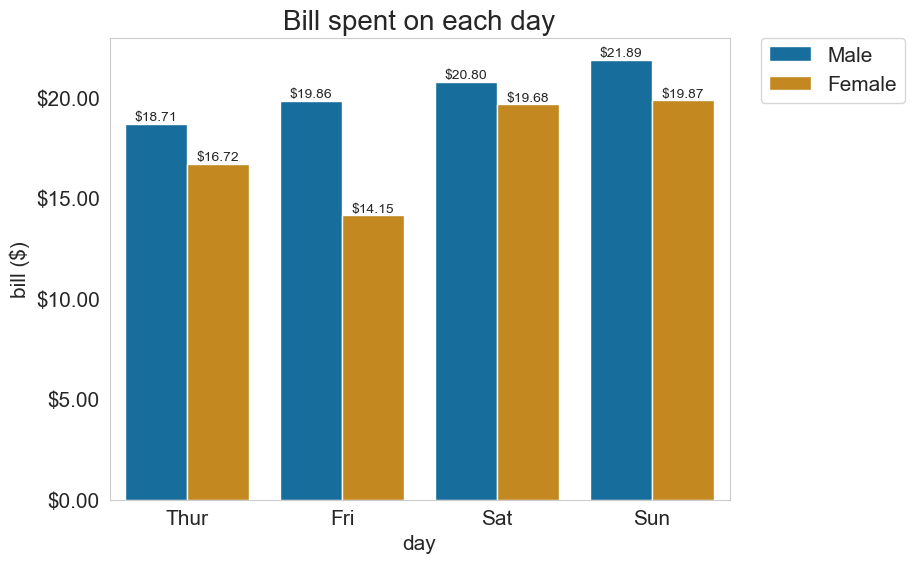

In [182]:
sns.set_style("whitegrid") ## set style up top
bar,ax = plt.subplots(figsize=(8,6)) ## always create a plot with a sublot

## make the actual barplot
ax.set_title("Bill spent on each day", fontsize=20)

ax.set_xlabel ("day", fontsize=15)
ax.tick_params(axis='x', labelsize=15)

ax.set_ylabel ("bill ($)", fontsize=15)
fmt =  '${x:,.2f}' # Format string
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.tick_params(axis='y', labelsize=15)

ax = sns.barplot(x='day', y='total_bill', hue= 'sex', data=df, errorbar=None, palette= palette[:2], orient='v')

[ax.bar_label(c, fmt = '${:,.2f}') for c in ax.containers]

# ax.bar_label(ax.containers[0], fmt = '${:,.2f}')
# ax.bar_label(ax.containers[1], fmt = '${:,.2f}')

## set the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
ax.grid(False)

plt.show()

In [196]:
[i for (_, i) in df.iterrows()]

[total_bill     16.99
 tip             1.01
 sex           Female
 smoker            No
 day              Sun
 time          Dinner
 size               2
 Name: 0, dtype: object,
 total_bill     10.34
 tip             1.66
 sex             Male
 smoker            No
 day              Sun
 time          Dinner
 size               3
 Name: 1, dtype: object,
 total_bill     21.01
 tip              3.5
 sex             Male
 smoker            No
 day              Sun
 time          Dinner
 size               3
 Name: 2, dtype: object,
 total_bill     23.68
 tip             3.31
 sex             Male
 smoker            No
 day              Sun
 time          Dinner
 size               2
 Name: 3, dtype: object,
 total_bill     24.59
 tip             3.61
 sex           Female
 smoker            No
 day              Sun
 time          Dinner
 size               4
 Name: 4, dtype: object,
 total_bill     25.29
 tip             4.71
 sex             Male
 smoker            No
 day             

In [ ]:
for i, (_, row) in enumerate(df.iterrows()):
    print(i)
    print(b)
    print(row)

0
0
total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object
1
1
total_bill     10.34
tip             1.66
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 1, dtype: object
2
2
total_bill     21.01
tip              3.5
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 2, dtype: object
3
3
total_bill     23.68
tip             3.31
sex             Male
smoker            No
day              Sun
time          Dinner
size               2
Name: 3, dtype: object
4
4
total_bill     24.59
tip             3.61
sex           Female
smoker            No
day              Sun
time          Dinner
size               4
Name: 4, dtype: object
5
5
total_bill     25.29
tip             4.71
sex             Male
smoker            No
day              Sun
time          Dinner


In [ ]:
# You can set general context as well
# Set style and increase font sizes
plt.rcParams['font.size'] = 12  # Base font size
plt.rcParams['axes.titlesize'] = 14  # Title font size
plt.rcParams['axes.labelsize'] = 12  # Axis labels size
plt.rcParams['xtick.labelsize'] = 11  # X-axis tick labels size
plt.rcParams['ytick.labelsize'] = 11  # Y-axis tick labels size
plt.rcParams['legend.fontsize'] = 11  # Legend font size
plt.rcParams['figure.titlesize'] = 16  # Figure title size

# If a plot uses seaborn, this is also an options
sns.set_context("notebook", font_scale=1.2)